# **Credit card churn analysis visualisations**

first I need to import all the libraries and import the cleaned data 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [17]:
df = pd.read_csv('../data/cleaned.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,712389108,Existing Customer,43,Female,2,Graduate,Married,Less than $40K,Blue,36,...,3,2,2570.0,2107,463.0,0.651,4058,83,0.766,0.820
1,718388733,Existing Customer,38,Female,1,College,Unknown,Less than $40K,Blue,32,...,3,3,2609.0,1259,1350.0,0.871,8677,96,0.627,0.483
2,710109633,Existing Customer,39,Male,2,College,Married,$60K - $80K,Blue,31,...,3,2,9871.0,1061,8810.0,0.545,1683,34,0.478,0.107
3,717331758,Existing Customer,44,Male,4,Graduate,Married,$120K +,Blue,32,...,3,4,34516.0,2517,31999.0,0.765,4228,83,0.596,0.073
4,709460883,Attrited Customer,38,Female,2,Doctorate,Married,Less than $40K,Blue,28,...,2,4,1614.0,0,1614.0,0.609,2437,46,0.438,0.000


I first want to check the proportion of customers that are attrited to check the scale of the problem with a pie chart 

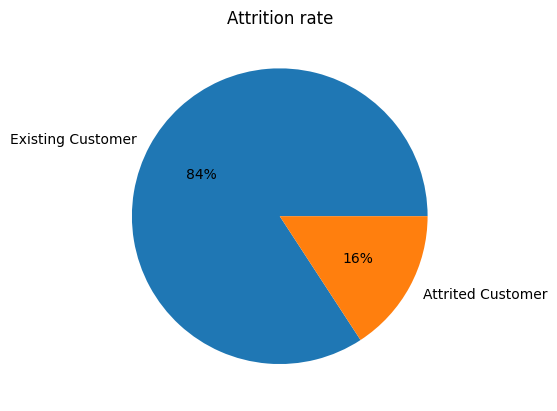

In [18]:
categorical_count = df.value_counts('Attrition_Flag',normalize=True)
plt.pie(x=categorical_count, labels=categorical_count.index,autopct='%1.0f%%')
plt.title("Attrition rate")
plt.show()

As we can see from the above figure 16% of the banks customers are attrited. 

I want to investigate whether younger people are more likely to churn as it is potentially risky to an individual's credit score and young people are more likely to take risks
I will display this in a histogram with a boxplot marginal.

In [19]:
fig = px.histogram(df, x="Customer_Age", color="Attrition_Flag", marginal="box",title="Customer Age Distribution by Attrition Flag")
fig.show()

There doesn't seem to a relationship between age and how likely someone is to churn

I want to test if there's a relationship between gender and attrition rate.

In [23]:
fig = px.bar(df, x="Gender", color="Attrition_Flag",barmode="stack", title="Attrition Flag by gender")
fig.show()

Females seem marginally more likely to churn than males.

I want to test the relationship between total transaction amount and months on book with attrition rate. I expect attrited customers not to be on the books long and to have spent less

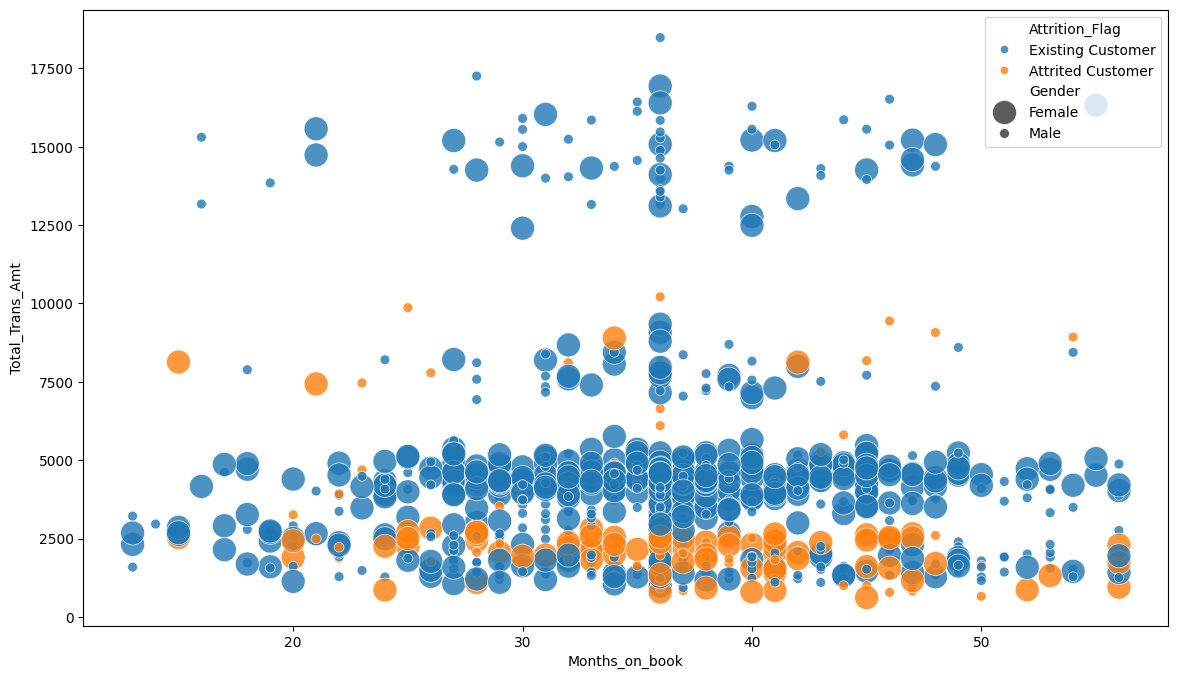

In [32]:
fig, axes = plt.subplots(figsize=(14,8))
sns.scatterplot(data=df, x='Months_on_book', y='Total_Trans_Amt',
                hue='Attrition_Flag',
                size='Gender', sizes=(50, 300),
                alpha=0.8)
plt.show()

The figure above shows that attrited customers match existing customers in terms of months on the books, however interestingly very few attrited customers have high transaction rates and infact trend towards low transacation amounts.